# Linear algebra in SciPy

> No one can be told what the matrix is. You have to see it for yourself.
>
> — Morpheus, *The Matrix*

Just like Chapter 4, which dealt with the Fast Fourier Transform, this chapter
will feature an elegant *method*. We
want to highlight the packages available in SciPy to do linear algebra, which forms
the basis of much scientific computing.

## Linear algebra basics

A chapter in a programming book is not really the right place to learn about
linear algebra itself, so we assume familiarity with linear algebra concepts.
At a minimum, you should know that linear algebra involves vectors (ordered
collections of numbers) and their transformations by multiplying them with
matrices (collections of vectors). If all of this sounded like gibberish to
you, you should probably pick up an introductory linear algebra textbook before
reading this. We highly recommend Gil Strang's *Linear Algebra and its
Applications*. Introductory is all you need though — we hope to convey the power
of linear algebra while keeping the operations relatively simple!

As an aside, we will break Python notation convention in order to match linear
algebra conventions: in Python, variables names should usually begin with a
lower case letter. However, in linear algebra, matrices are denoted by
a capital letter, while vectors and scalar values are lowercase. Since we're
going to be dealing with quite a few matrices and vectors, following the
linear algebra convention helps to keep them straight. Therefore, variables
that represent matrices will start with a capital letter, while vectors and
numbers will start with lowercase:

In [1]:
import numpy as np

m, n = (5, 6)  # scalars
M = np.ones((m, n))  # a matrix
v = np.random.random((n,))  # a vector
w = M @ v  # another vector

In mathematical notation, the vectors would typically be written in boldface,
as in $\mathbf{v}$ and $\mathbf{w}$, while the scalars would not, as
in $m$ and $n$.  In Python code, we can't make that distinction, so we will rely instead
on context to keep scalars and vectors straight.

## Laplacian matrix of a graph

We discussed graphs in chapter 3, where we represented image regions as
nodes, connected by edges between them. But we used a rather simple method of
analysis: we *thresholded* the graph, removing all edges above some value.
Thresholding works in simple cases, but can easily fail, because all you need
is one value to fall on the wrong side of the threshold for the approach
to fail.

As an example, suppose you are at war, and your enemy is camped just across the
river from your forces. You want to cut them off, so you decide to blow up all
the bridges between you. Intelligence suggests that you need $t$ kilograms of
TNT to blow each bridge crossing the river, but the bridges in your own
territory can withstand $t+1$ kg. You might, having just read chapter 3 of
*Elegant SciPy*, order your commandos to detonate $t$ kg of TNT on every bridge
in the region. But, if intelligence was wrong about just *one* bridge crossing
the river, and it remains standing, the enemy's army can come marching through!
Disaster!

So, in this chapter, we will explore some alternative approaches to graph
analysis, based on linear algebra. It turns out that we can think of a graph, $G$,
as an *adjacency matrix*, in which we number the nodes of the graph from $0$
to $n-1$, and place a 1 in row $i$, column $j$ of the matrix whenever there is
an edge from node $i$ to node $j$. In other words, if we call the adjacency
matrix $A$, then $A_{i, j} = 1$ if and only if the edge $(i, j)$ is in $G$. We
can then use linear algebra techniques to study this matrix, often with
striking results.

The *degree* of a node is defined as the number of edges touching it.  For
example, if a node is connected to five other nodes in a graph, its degree
is 5. (Later, we will differentiate between out-degree and in-degree, when edges
have a "from" and "to".) In matrix terms, the degree corresponds to the *sum*
of the values in a row or column.

The *Laplacian* matrix of a graph (just "the Laplacian" for short) is defined
as the *degree matrix*, $D$, which
contains the degree of each node along the diagonal and zero everywhere else,
minus the adjacency matrix $A$:

$
L = D - A
$

We definitely can't fit all of the linear algebra theory needed to understand
the properties of this matrix, but suffice it to say: it has some *great*
properties. We will exploit a couple in the following paragraphs.

First, we will look at the *eigenvectors* of $L$.
An eigenvector $v$ of a matrix $M$ is a vector that
satisfies the property $Mv = \lambda v$ for some number $\lambda$,
known as the eigenvalue.  In other words, $v$ is a special vector in
relation to $M$ because $Mv$ simply changes the size of the vector, without
changing its direction. As we will soon see, eigenvectors have many useful
properties — sometimes seeming even magical!

As an example, a 3x3 rotation matrix $R$, when multiplied by any
3-dimensional vector $p$, rotates it $30^\circ$ degrees around the z-axis.  $R$
will rotate all vectors except for those that lie *on* the z-axis.  For those,
we'll see no effect, or $Rp = p$, i.e. $Rp = \lambda p$ with
eigenvalue $\lambda = 1$.

<!-- exercise begin -->

**Exercise:** Consider the rotation matrix

$
R = \begin{bmatrix}
  \cos \theta &  -\sin \theta & 0 \\
  \sin \theta & \cos \theta & 0\\
  0 & 0 & 1\\
\end{bmatrix}
$

When $R$ is multiplied with a 3-dimensional column-vector $p =
\left[ x\, y\, z \right]^T$, the resulting vector $R p$ is rotated
by $\theta$ degrees around the z-axis.

1. For $\theta = 45^\circ$, verify (by testing on a few arbitrary
   vectors) that $R$ rotates these vectors around the z axis.
   Remember that matrix multiplication in Python is denoted with `@`.

2. What does the matrix $S = RR$ do? Verify this in Python.

3. Verify that multiplying by $R$ leaves the vector
   $\left[ 0\, 0\, 1\right]^T$ unchanged.  In other words, $R p = 1
   p$, which means $p$ is an eigenvector of $R$ with eigenvalue 1.

4. Use `np.linalg.eig` to find the eigenvalues and eigenvectors of $R$, and
   verify that $\left[0, 0, 1\right]^T$ is indeed among them, and that it
   corresponds to the eigenvalue 1.

<!-- solution begin -->

**Solution:**

Part 1:

In [2]:
import numpy as np

theta = np.deg2rad(45)
R = np.array([[np.cos(theta), -np.sin(theta), 0],
              [np.sin(theta),  np.cos(theta), 0],
              [            0,              0, 1]])

print("R times the x-axis:", R @ [1, 0, 0])
print("R times the y-axis:", R @ [0, 1, 0])
print("R times a 45 degree vector:", R @ [1, 1, 0])

R times the x-axis: [0.70710678 0.70710678 0.        ]
R times the y-axis: [-0.70710678  0.70710678  0.        ]
R times a 45 degree vector: [1.11022302e-16 1.41421356e+00 0.00000000e+00]


Part 2:

Since multiplying a vector by $R$ rotates it 45 degrees, multiplying the result
by $R$ again should result in the original vector being rotated 90 degrees.
Matrix multiplication is associative, which means that $R(Rv) = (RR)v$, so
$S = RR$ should rotate vectors by 90 degrees around the z-axis.

In [3]:
S = R @ R
S @ [1, 0, 0]

array([2.22044605e-16, 1.00000000e+00, 0.00000000e+00])

Part 3:

In [4]:
print("R @ z-axis:", R @ [0, 0, 1])

R @ z-axis: [0. 0. 1.]


R rotates both the x and y axes, but not the z-axis.

Part 4:

Looking at the documentation of `eig`, we see that it returns two values:
a 1D array of eigenvalues, and a 2D array where each column contains the
eigenvector corresponding to each eigenvalue.

In [5]:
np.linalg.eig(R)

(array([0.70710678+0.70710678j, 0.70710678-0.70710678j,
        1.        +0.j        ]),
 array([[0.70710678+0.j        , 0.70710678-0.j        ,
         0.        +0.j        ],
        [0.        -0.70710678j, 0.        +0.70710678j,
         0.        +0.j        ],
        [0.        +0.j        , 0.        -0.j        ,
         1.        +0.j        ]]))

In addition to some complex-valued eigenvalues and vectors, we see the value 1
associated with the vector $\left[0, 0, 1\right]^T$.

<!-- solution end -->

<!-- exercise end -->

Back to the Laplacian. A common problem in network analysis is visualization.
How do you draw nodes and edges in such a way that you don't get a complete
mess such as this one?

<img src="https://upload.wikimedia.org/wikipedia/commons/9/90/Visualization_of_wiki_structure_using_prefuse_visualization_package.png"/>
<!-- caption text="Visualization of wikipedia structure. Created by Chris Davis and released under CC-BY-SA-3.0 (https://commons.wikimedia.org/wiki/GNU_Free_Documentation_License)." -->


One way is to put nodes that share many edges close together. It turns out
that this can be done by using the second-smallest eigenvalue of the Laplacian
matrix, and its corresponding eigenvector, which is so important it has its
own name: the
[Fiedler vector](https://en.wikipedia.org/wiki/Algebraic_connectivity#The_Fiedler_vector).

Let's use a minimal network to illustrate this. We start by creating the
adjacency matrix:

In [6]:
import numpy as np
A = np.array([[0, 1, 1, 0, 0, 0],
              [1, 0, 1, 0, 0, 0],
              [1, 1, 0, 1, 0, 0],
              [0, 0, 1, 0, 1, 1],
              [0, 0, 0, 1, 0, 1],
              [0, 0, 0, 1, 1, 0]], dtype=float)

We can use NetworkX to draw this network. First, we initialize matplotlib as
usual:

In [7]:
# Make plots appear inline, set custom plotting style
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('style/elegant.mplstyle')

Now, we can plot it:

/Users/squiresrb/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


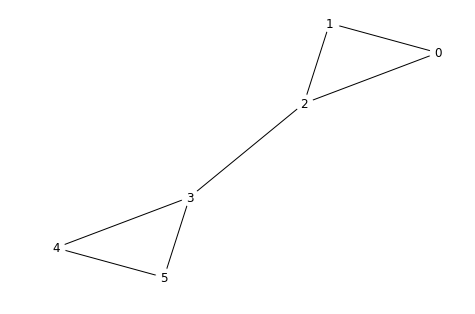

In [8]:
import networkx as nx
g = nx.from_numpy_matrix(A)
layout = nx.spring_layout(g, pos=nx.circular_layout(g))
nx.draw(g, pos=layout,
        with_labels=True, node_color='white')

<!-- caption text="A simple network plotted with NetworkX" -->


You can see that the nodes fall naturally into two groups, 0, 1, 2 and 3, 4, 5.
Can the Fiedler vector tell us this? First, we must compute the degree matrix
and the Laplacian. We first get the degrees by summing along either axis of $A$.
(Either axis works because $A$ is symmetric.)

In [9]:
d = np.sum(A, axis=0)
print(d)

[2. 2. 3. 3. 2. 2.]


We then put those degrees into a diagonal matrix of the same shape
as A, the *degree matrix*. We can use the `np.diag` function to do this:

In [10]:
D = np.diag(d)
print(D)

[[2. 0. 0. 0. 0. 0.]
 [0. 2. 0. 0. 0. 0.]
 [0. 0. 3. 0. 0. 0.]
 [0. 0. 0. 3. 0. 0.]
 [0. 0. 0. 0. 2. 0.]
 [0. 0. 0. 0. 0. 2.]]


Finally, we get the Laplacian from the definition:

In [11]:
L = D - A
print(L)

[[ 2. -1. -1.  0.  0.  0.]
 [-1.  2. -1.  0.  0.  0.]
 [-1. -1.  3. -1.  0.  0.]
 [ 0.  0. -1.  3. -1. -1.]
 [ 0.  0.  0. -1.  2. -1.]
 [ 0.  0.  0. -1. -1.  2.]]


Because $L$ is symmetric, we can use the `np.linalg.eigh` function to compute
the eigenvalues and eigenvectors:

In [12]:
val, Vec = np.linalg.eigh(L)

You can verify that the values returned satisfy the definition of eigenvalues
and eigenvectors. For example, one of the eigenvalues is 3:

In [13]:
np.any(np.isclose(val, 3))

True

And we can check that multiplying the matrix $L$ by the corresponding eigenvector
does indeed multiply the vector by 3:

In [14]:
idx_lambda3 = np.argmin(np.abs(val - 3))
v3 = Vec[:, idx_lambda3]

print(v3)
print(L @ v3)

[ 0.69255756 -0.51508781 -0.17746975 -0.17746975  0.38564378 -0.20817404]
[ 2.07767267 -1.54526343 -0.53240924 -0.53240924  1.15693135 -0.62452211]


As mentioned above, the Fiedler vector is the vector corresponding to the
second-smallest eigenvalue of $L$. Sorting the eigenvalues tells us which one
is the second-smallest:

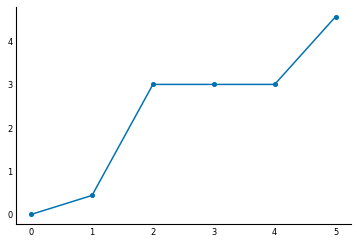

In [15]:
plt.plot(np.sort(val), linestyle='-', marker='o');

<!-- caption text="Eigenvalues of $L$" -->

It's the first non-zero eigenvalue, close to 0.4. The Fiedler vector is the
corresponding eigenvector:

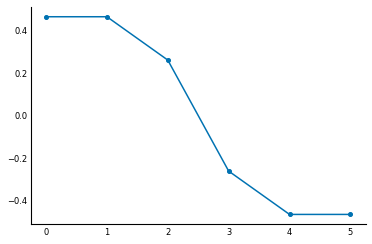

In [16]:
f = Vec[:, np.argsort(val)[1]]
plt.plot(f, linestyle='-', marker='o');

<!-- caption text="Fiedler vector of $L$" -->

It's pretty remarkable: by looking at the *sign* of the elements of the Fiedler
vector, we can separate the nodes into the two groups we identified in the
drawing!

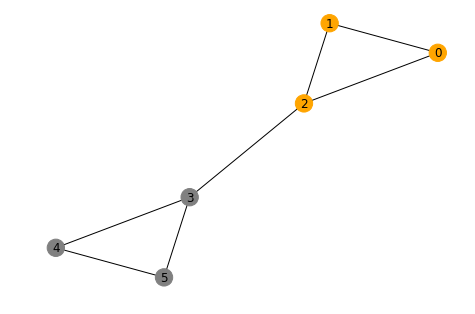

In [17]:
colors = ['orange' if eigv > 0 else 'gray' for eigv in f]
nx.draw(g, pos=layout, with_labels=True, node_color=colors)

<!-- caption text="Nodes colored by their sign in the Fiedler vector of $L$" -->

## Laplacians with brain data

Let's demonstrate this process in a real-world example by laying out the brain cells in a worm, as shown in
[Figure 2](http://journals.plos.org/ploscompbiol/article?id=10.1371/journal.pcbi.1001066)
from the
[Varshney *et al* paper](http://journals.plos.org/ploscompbiol/article?id=10.1371/journal.pcbi.1001066)
that we introduced in Chapter 3. (Information on
how to do this is in the
[supplementary material](http://journals.plos.org/ploscompbiol/article/asset?unique&id=info:doi/10.1371/journal.pcbi.1001066.s001)
for the paper.) To obtain their
layout of the worm brain neurons, they used a related matrix, the
*degree-normalized Laplacian*.

Because the order of the neurons is important in this analysis, we will use a
preprocessed dataset, rather than clutter this chapter with data cleaning. We
got the original data from Lav Varshney's
[website](http://www.ifp.illinois.edu/~varshney/elegans),
and the processed data is in our `data/` directory.

First, let's load the data. There are four components:
- the network of chemical synapses, through which a *pre-synaptic neuron*
  sends a chemical signal to a *post-synaptic* neuron,
- the gap junction network, which contains direct electrical contacts between
  neurons),
- the neuron IDs (names), and
- the three neuron types:
  - *sensory neurons*, those that detect signals coming from the outside world,
    encoded as 0;
  - *motor neurons*, those that activate muscles, enabling the worm to move,
    encoded as 2; and
  - *interneurons*, the neurons in between, which enable complex signal processing
    to occur between sensory neurons and motor neurons, encoded as 1.

In [18]:
import numpy as np
Chem = np.load('data/chem-network.npy')
Gap = np.load('data/gap-network.npy')
neuron_ids = np.load('data/neurons.npy')
neuron_types = np.load('data/neuron-types.npy')

We then simplify the network, adding the two kinds of connections together,
and removing the directionality of the network by taking the average of
in-connections and out-connections of neurons. This seems a bit like cheating
but, since we are only looking for the *layout* of the neurons on a graph, we
only care about *whether* neurons are connected, not in which direction.
We are going to call the resulting matrix the *connectivity* matrix, $C$, which
is just a different kind of adjacency matrix.

In [19]:
A = Chem + Gap
C = (A + A.T) / 2

To get the Laplacian matrix $L$, we need the degree matrix $D$, which contains
the degree of node i at position [i, i], and zeros everywhere else.

In [20]:
degrees = np.sum(C, axis=0)
D = np.diag(degrees)

Now, we can get the Laplacian just like before:

In [21]:
L = D - C

The vertical coordinates in Fig 2 are given by arranging nodes such that, on
average, neurons are as close as possible to "just above" their downstream
neighbors. Varshney _et al_ call this measure "processing depth," and it's
obtained by solving a linear equation involving the Laplacian. We use
`scipy.linalg.pinv`, the
[pseudoinverse](https://en.wikipedia.org/wiki/Moore%E2%80%93Penrose_pseudoinverse),
to solve it:

In [22]:
from scipy import linalg
b = np.sum(C * np.sign(A - A.T), axis=1)
z = linalg.pinv(L) @ b

(Note the use of the `@` symbol, which was introduced in Python 3.5 to denote
matrix multiplication. As we noted in the preface and in Chapter 5, in previous
versions of Python, you would need to use the function `np.dot`.)

In order to obtain the degree-normalized Laplacian, $Q$, we need the inverse
square root of the $D$ matrix:

In [23]:
Dinv2 = np.diag(1 / np.sqrt(degrees))
Q = Dinv2 @ L @ Dinv2

Finally, we are able to extract the $x$ coordinates of the neurons to ensure that
highly-connected neurons remain close: the eigenvector of $Q$ corresponding to
its second-smallest eigenvalue, normalized by the degrees:

In [24]:
val, Vec = linalg.eig(Q)

Note from the documentation of `numpy.linalg.eig`:

> "The eigenvalues are not necessarily ordered."

Although the documentation in SciPy's `eig` lacks this warning, it remains true
in this case. We must therefore sort the eigenvalues and the corresponding
eigenvector columns ourselves:

In [25]:
smallest_first = np.argsort(val)
val = val[smallest_first]
Vec = Vec[:, smallest_first]

Now we can find the eigenvector we need to compute the affinity coordinates:

In [26]:
x = Dinv2 @ Vec[:, 1]

(The reasons for using this vector are too long to explain here, but appear in
the paper's supplementary material, linked above. The short version is that
choosing this vector minimizes the total length of the links between neurons.)

There is one small kink that we must address before proceeding: eigenvectors
are only defined up to a multiplicative constant. This follows simply from the
definition of an eigenvector: suppose $v$ is an eigenvector of the matrix $M$,
with corresponding eigenvalue $\lambda$. Then $\alpha v$ is also an eigenvector
of $M$ for any scalar number $\alpha$,
because $Mv = \lambda v$ implies $M(\alpha v) = \lambda (\alpha v)$.
So, it is
arbitrary whether a software package returns $v$ or $-v$ when asked for the
eigenvectors of $M$. In order to make sure we reproduce the layout from the
Varshney *et al.* paper, we must make sure that the vector is pointing in the
same direction as theirs, rather than the opposite direction. We do this by
choosing an arbitrary neuron from their Figure 2, and checking the sign of `x`
at that position. We then reverse it if it doesn't match its sign in Figure 2
of the paper.

In [27]:
vc2_index = np.argwhere(neuron_ids == 'VC02')
if x[vc2_index] < 0:
    x = -x

Now it's just a matter of drawing the nodes and the edges. We color them
according to the type stored in `neuron_types`, using the appealing and
functional "colorblind"
[colorbrewer palette](http://chrisalbon.com/python/seaborn_color_palettes.html):

In [28]:
from matplotlib.colors import ListedColormap
from matplotlib.collections import LineCollection


def plot_connectome(x_coords, y_coords, conn_matrix, *,
                    labels=(), types=None, type_names=('',),
                    xlabel='', ylabel=''):
    """Plot neurons as points connected by lines.

    Neurons can have different types (up to 6 distinct colors).

    Parameters
    ----------
    x_coords, y_coords : array of float, shape (N,)
        The x-coordinates and y-coordinates of the neurons.
    conn_matrix : array or sparse matrix of float, shape (N, N)
        The connectivity matrix, with non-zero entry (i, j) if and only
        if node i and node j are connected.
    labels : array-like of string, shape (N,), optional
        The names of the nodes.
    types : array of int, shape (N,), optional
        The type (e.g. sensory neuron, interneuron) of each node.
    type_names : array-like of string, optional
        The name of each value of `types`. For example, if a 0 in
        `types` means "sensory neuron", then `type_names[0]` should
        be "sensory neuron".
    xlabel, ylabel : str, optional
        Labels for the axes.
    """
    if types is None:
        types = np.zeros(x_coords.shape, dtype=int)
    ntypes = len(np.unique(types))
    colors = plt.rcParams['axes.prop_cycle'][:ntypes].by_key()['color']
    cmap = ListedColormap(colors)

    fig, ax = plt.subplots()

    # plot neuron locations:
    for neuron_type in range(ntypes):
        plotting = (types == neuron_type)
        pts = ax.scatter(x_coords[plotting], y_coords[plotting],
                         c=cmap(neuron_type), s=4, zorder=1)
        pts.set_label(type_names[neuron_type])

    # add text labels:
    for x, y, label in zip(x_coords, y_coords, labels):
        ax.text(x, y, '   ' + label,
                verticalalignment='center', fontsize=3, zorder=2)

    # plot edges
    pre, post = np.nonzero(conn_matrix)
    links = np.array([[x_coords[pre], x_coords[post]],
                      [y_coords[pre], y_coords[post]]]).T
    ax.add_collection(LineCollection(links, color='lightgray',
                                     lw=0.3, alpha=0.5, zorder=0))

    ax.legend(scatterpoints=3, fontsize=6)

    ax.set_xlabel(xlabel, fontsize=8)
    ax.set_ylabel(ylabel, fontsize=8)

    plt.show()

Now, let's use that function to plot the neurons:

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


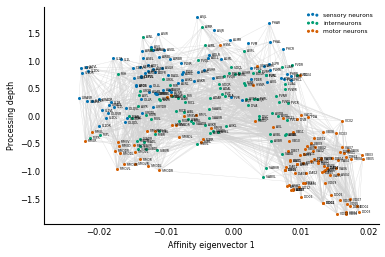

In [29]:
plot_connectome(x, z, C, labels=neuron_ids, types=neuron_types,
                type_names=['sensory neurons', 'interneurons',
                            'motor neurons'],
                xlabel='Affinity eigenvector 1', ylabel='Processing depth')

<!-- caption text="Spectral layout of the neurons of a nematode worm" -->

There you are: a worm brain!
As discussed in the original paper, you can see the top-down processing from
sensory neurons to motor neurons through a network of interneurons. You can
also see two distinct groups of motor neurons: these correspond to the neck
(left) and body (right) body segments of the worm.

<!-- exercise begin -->

**Exercise:** How do you modify the above code to show the affinity view in
Figure 2B from the paper?

<!-- solution begin -->
**Solution:** In the affinity view, instead of using the processing depth on the y-axis,
we use the normalized third eigenvector of Q, just like we did with x. (And we
invert it if necessary, just like we did with x!)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


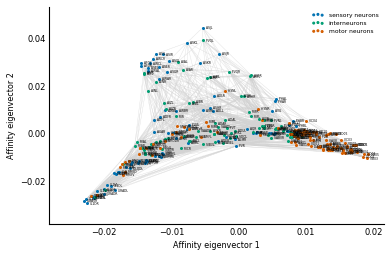

In [30]:
y = Dinv2 @ Vec[:, 2]
asjl_index = np.argwhere(neuron_ids == 'ASJL')
if y[asjl_index] < 0:
    y = -y

plot_connectome(x, y, C, labels=neuron_ids, types=neuron_types,
                type_names=['sensory neurons', 'interneurons',
                            'motor neurons'],
                xlabel='Affinity eigenvector 1',
                ylabel='Affinity eigenvector 2')

<!-- caption text="Spectral layout of the neurons of a nematode worm, using two
spectral dimensions" -->

<!-- solution end -->

<!-- exercise end -->

<!-- exercise begin -->

### Challenge: linear algebra with sparse matrices

The above code uses numpy arrays to hold the matrix and perform
the necessary computations. Because we are using a small graph of fewer than 300
nodes, this is feasible. However, for larger graphs, it would fail.

For example, one might want to analyse the relationships between libraries
listed on the Python Package Index, or PyPI, which contains over one hundred thousand packages.
Holding the Laplacian matrix for this graph would take 
up $8 \left(100 \times 10^3\right)^2 = 8 \times 10^10$ bytes, or 80GB,
of RAM. If you add to that the adjacency, symmetric adjacency, pseudoinverse,
and, say, two temporary matrices used during calculations, you climb up to
480GB, beyond the reach of most desktop computers.

"Ha!", some of you might be thinking. "Ha! My desktop has 512GB of RAM! It would
make short work of this so-called 'large' graph!"

Perhaps. But you might also want to analyze the Association for Computing
Machinery (ACM) citation graph, a network of over two million scholarly works
and references. *That* Laplacian would take up 32 terabytes of RAM.

However, we know that the dependency and reference graphs are *sparse*:
packages usually depend on just a few other packages, not on the whole of PyPI.
And papers and books usually only reference a few others, too. So we can hold
the above matrices using the sparse data structures from `scipy.sparse` (see
Chapter 5), and use the linear algebra functions in `scipy.sparse.linalg` to
compute the values we need.

Try to explore the documentation in `scipy.sparse.linalg` to come up with a
sparse version of the above computation.

Hint: the pseudoinverse of a sparse matrix is, in general, not sparse, so you
can't use it here. Similarly, you can't get all the eigenvectors of a sparse
matrix, because they would together make up a dense matrix.

You'll find parts of the solution below (and of course in the solutions
chapter), but we highly recommend that you try it out on your own.

<!-- solution begin -->

### Challenge accepted

For the purposes of this challenge, we are going to use the small connectome
above, because it's easier to visualise what is going on. In later parts of the
challenge we'll use these techniques to analyze larger networks.

First, we start with the adjacency matrix, A, in a sparse matrix format, in
this case, CSR, which is the most common format for linear algebra. We'll
append `s` to the names of all the matrices to indicate that they are sparse.

In [31]:
from scipy import sparse
import scipy.sparse.linalg

As = sparse.csr_matrix(A)

We can create our connectivity matrix in the same way:

In [32]:
Cs = (As + As.T) / 2

In order to get the degrees matrix, we can use the "diags" sparse format, which
stores diagonal and off-diagonal matrices.

In [33]:
degrees = np.ravel(Cs.sum(axis=0))
Ds = sparse.diags(degrees)

Getting the Laplacian is straightforward:

In [34]:
Ls = Ds - Cs

Now we want to get the processing depth. Remember that getting the
pseudo-inverse of the Laplacian matrix is out of the question, because it will
be a dense matrix (the inverse of a sparse matrix is not generally sparse
itself). However, we were actually using the pseudo-inverse to compute a
vector $z$ that would satisfy $L z = b$,
where $b = C \odot \textrm{sign}\left(A - A^T\right) \mathbf{1}$.
(You can see this in the supplementary material for Varshney *et al*.) With
dense matrices, we can simply use $z = L^+b$. With sparse ones, though, we can
use one of the *solvers* (see sidebox, "Solvers") in `sparse.linalg.isolve` to get the `z` vector after
providing `L` and `b`, no inversion required!

In [35]:
b = Cs.multiply((As - As.T).sign()).sum(axis=1)
z, error = sparse.linalg.isolve.cg(Ls, b, maxiter=10000)

Finally, we must find the eigenvectors of $Q$, the degree-normalized Laplacian,
corresponding to its second and third smallest eigenvalues.

You might recall from Chapter 5 that the numerical data in sparse matrices is
in the `.data` attribute. We use that to invert the degrees matrix:

In [36]:
Dsinv2 = Ds.copy()
Dsinv2.data = 1 / np.sqrt(Ds.data)

Finally, we use SciPy's sparse linear algebra functions to find the desired
eigenvectors. The $Q$ matrix is symmetric, so we can use the `eigsh` function,
specialized for symmetric matrices, to compute them. We use the `which` keyword
argument to specify that we want the eigenvectors corresponding to the smallest
eigenvalues, and `k` to specify that we need the 3 smallest:

In [37]:

Qs = Dsinv2 @ Ls @ Dsinv2
vals, Vecs = sparse.linalg.eigsh(Qs, k=3, which='SM')
sorted_indices = np.argsort(vals)
Vecs = Vecs[:, sorted_indices]

Finally, we normalize the eigenvectors to get the x and y coordinates
(and flip these if necessary):

In [38]:
_dsinv, x, y = (Dsinv2 @ Vecs).T
if x[vc2_index] < 0:
    x = -x
if y[asjl_index] < 0:
    y = -y

(Note that the eigenvector corresponding to the smallest eigenvalue is always a
vector of all ones, which we're not interested in.)
We can now reproduce the above plots!

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


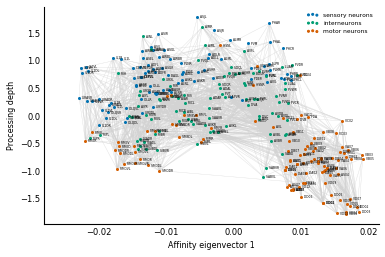

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


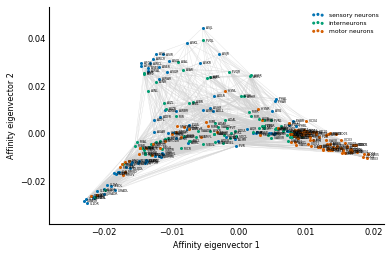

In [39]:
plot_connectome(x, z, C, labels=neuron_ids, types=neuron_types,
                type_names=['sensory neurons', 'interneurons',
                            'motor neurons'],
                xlabel='Affinity eigenvector 1', ylabel='Processing depth')

plot_connectome(x, y, C, labels=neuron_ids, types=neuron_types,
                type_names=['sensory neurons', 'interneurons',
                            'motor neurons'],
                xlabel='Affinity eigenvector 1',
                ylabel='Affinity eigenvector 2')

<!-- caption text="Spectral layout of a nematode brain, computed using sparse
matrices" -->

<!-- solution end -->

<!-- exercise end -->

> **Solvers {.callout}**
>
> SciPy has several sparse iterative solvers available, and it is not always
> obvious which to use.  Unfortunately, that question also has no easy answer:
> different algorithms have different strengths in terms of speed of
> convergence, stability, accuracy, and memory use (amongst others).  It is also
> not possible to predict, by looking at the input data, which algorithm will
> perform best.
> 
> Here is a rough guideline for choosing an iterative solver:
> 
> - If A, the input matrix, is symmetric and positive definite, use the
>   Conjugate Gradient solver `cg`.  If A is symmetric, but
>   near-singular or indefinite, try the Minimum Residual iteration
>   method `minres`.
> 
> - For non-symmetric systems, try the Biconjugate Gradient Stabilized
>   method, `bicgstab`.  The Conjugate Gradient Squared method, `cgs`,
>   is a bit faster, but has more erratic convergence.
> 
> - If you need to solve many similar systems, use the LGMRES algorithm `lgmres`.
> 
> - If A is not square, use the least squares algorithm `lsmr`.
> 
> For further reading, see
> 
> - **How Fast are Nonsymmetric Matrix Iterations?**,
>   Noël M. Nachtigal, Satish C. Reddy, and Lloyd N. Trefethen
>   SIAM Journal on Matrix Analysis and Applications 1992 13:3, 778-795.
> 
> - **Survey of recent Krylov methods**, Jack Dongarra,
>   http://www.netlib.org/linalg/html_templates/node50.html


## PageRank: linear algebra for reputation and importance

Another application of linear algebra and eigenvectors is Google's PageRank
algorithm, which is punnily named both for webpages and for one of its
co-founders, Larry Page.

To rank webpages by importance, you might count
how many other webpages link to it. After all, if everyone is linking to a
particular page, it must be good, right? But this metric is
easily gamed: to make your own webpage rise in the rankings, just
create as many other webpages as you can and have them all link to your
original page.

The key insight that drove Google's early success was that important webpages
are not linked to by just many webpages, but by *important*
webpages. And how do we know that those other pages are important? Because
they themselves are linked to by important pages. And so on.

This recursive definition implies that page
importance can be measured by an eigenvector
of the so-called *transition matrix*, which contains the links
between webpages. Suppose you have your vector of importance $\boldsymbol{r}$,
and your matrix of links $M$. You don't know $\boldsymbol{r}$ yet, but you
do know that the importance of a page is proportional to the sum of
importances of the pages that link to it: $\boldsymbol{r} = \alpha M \boldsymbol{r}$,
or $M \boldsymbol{r} = \lambda \boldsymbol{r}$, for $\lambda = 1/\alpha$. That's
just the definition of an eigenvalue!

By ensuring some special properties are satisfied by the transition matrix, we
can further determine that the required eigenvalue is 1, and that it is the
largest eigenvalue of $M$.

The transition matrix imagines a web
surfer, often named Webster, randomly clicking a link from each webpage he
visits, and then asks, what's the probability that he ends up at any given
page? This probability is called the PageRank.

Since Google's rise, researchers have been applying PageRank to all sorts of
networks. We'll use an example by Stefano Allesina and Mercedes Pascual,
which they
[published](http://journals.plos.org/ploscompbiol/article?id=10.1371/journal.pcbi.1000494i)
in PLoS Computational Biology. They thought to apply the method in ecological
*food webs*, networks that link species to those that they eat.

Naively, if you wanted to see how critical a species was for an ecosystem, you
would look at how many species eat it. If it's many, and that species
disappeared, then all its "dependent" species might disappear with it. In
network parlance, you could say that its *in-degree* determines its ecological
importance.

Could PageRank be a better measure of importance for an ecosystem?

Professor Allesina kindly provided us with a few food webs to play around
with. We've saved one of these, from the St Marks National Wildlife Refuge in
Florida, in the Graph Markup Language format. The web was
[described](http://www.sciencedirect.com/science/article/pii/S0304380099000228)
in 1999 by Robert R. Christian and Joseph J. Luczovich. In the dataset, a
node $i$ has an edge to node $j$ if species $i$ eats species $j$.

We'll start by loading in the data, which NetworkX knows how to read trivially:

In [40]:
import networkx as nx

stmarks = nx.read_gml('data/stmarks.gml')

Next, we get the sparse matrix corresponding to the graph. Because a matrix
only holds numerical information, we need to maintain a separate list of
package names corresponding to the matrix rows/columns:

In [41]:
species = np.array(list(stmarks.nodes()))  # array for multi-indexing
Adj = nx.to_scipy_sparse_matrix(stmarks, dtype=np.float64)

From the adjacency matrix, we can derive a *transition probability* matrix,
where every edge is replaced by a *probability* of 1 over the number of
outgoing edges from that species. In the food web, it might make more sense
to call this a lunch probability matrix.

The total number of species in our matrix is going to be used a lot, so let's
call it $n$:

In [42]:
n = len(species)

Next, we need the degrees, and, in particular, the *diagonal matrix* containing
the inverse of the out-degrees of each node on the diagonal:

In [43]:
np.seterr(divide='ignore')  # ignore division-by-zero errors
from scipy import sparse

degrees = np.ravel(Adj.sum(axis=1))
Deginv = sparse.diags(1 / degrees).tocsr()

In [44]:
Trans = (Deginv @ Adj).T

Normally, the PageRank score would simply be the first eigenvector of the
transition matrix. If we call the transition matrix $M$ and the vector of
PageRank values $r$, we have:

$$
\boldsymbol{r} = M\boldsymbol{r}
$$

But the `np.seterr` call above is a clue that it's not quite
so simple. The PageRank approach only works when the
transition matrix is a *column-stochastic* matrix, in which every
column sums to 1. Additionally, every page must be reachable
from every other page, even if the path to reach it is very long.

In our food web, this causes problems, because the bottom of the food chain,
what the authors call *detritus* (basically sea sludge), doesn't actually *eat*
anything (the Circle of Life notwithstanding), so you can't reach other species
from it.

> *Young Simba:* But, Dad, don't we eat the antelope?
>
> *Mufasa:* Yes, Simba, but let me explain. When we die, our bodies become the
> grass, and the antelope eat the grass. And so we are all connected in the
> great Circle of Life.
>
> — *The Lion King*

To deal with this, the PageRank algorithm uses a so-called "damping
factor", usually taken to be 0.85. This means that 85% of the time, the
algorithm follows a link at random, but for the other 15%, it randomly jumps to
any arbitrary page. It's as if every page had a low probability link to every
other page. Or, in our case, it's as if shrimp, on rare occasions, ate sharks.
It might seem non-sensical but bear with us! It is, in fact, the mathematical
representation of the Circle of Life. We'll set it to 0.85, but actually it
doesn't really matter for this analysis: the results are similar for a large
range of possible damping factors.

If we call the damping factor $d$, then the modified PageRank equation is:

$$
\boldsymbol{r} = dM\boldsymbol{r} + \frac{1-d}{n} \boldsymbol{1}
$$

and

$$
(\boldsymbol{I} - dM)\boldsymbol{r} = \frac{1-d}{n} \boldsymbol{1}
$$

We can solve this equation using `scipy.sparse.linalg`'s direct
solver, `spsolve`. Depending on the structure and size of a linear algebra
problem, though, it might be more efficient to use an iterative solver. See
the [`scipy.sparse.linalg` documentation](http://docs.scipy.org/doc/scipy/reference/sparse.linalg.html#solving-linear-problems)
for more information on this.

In [45]:
from scipy.sparse.linalg import spsolve

damping = 0.85
beta = 1 - damping

I = sparse.eye(n, format='csc')  # Same sparse format as Trans

pagerank = spsolve(I - damping * Trans,
                   np.full(n, beta / n))

We now have the "foodrank" of the St. Marks food web!

So how does a species' foodrank compare to the number of other species eating
it?

In [46]:
def pagerank_plot(in_degrees, pageranks, names, *,
                  annotations=[], **figkwargs):
    """Plot node pagerank against in-degree, with hand-picked node names."""

    fig, ax = plt.subplots(**figkwargs)
    ax.scatter(in_degrees, pageranks, c=[0.835, 0.369, 0], lw=0)
    for name, indeg, pr in zip(names, in_degrees, pageranks):
        if name in annotations:
            text = ax.text(indeg + 0.1, pr, name)

    ax.set_ylim(0, np.max(pageranks) * 1.1)
    ax.set_xlim(-1, np.max(in_degrees) * 1.1)
    ax.set_ylabel('PageRank')
    ax.set_xlabel('In-degree')

We now draw the plot. Having explored the dataset before writing this, we have
pre-labeled some interesting nodes in the plot:

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


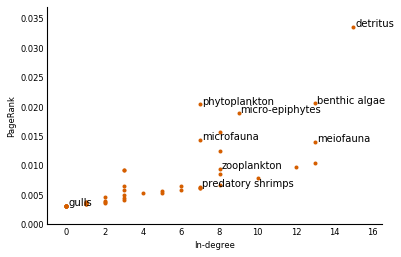

In [47]:
interesting = ['detritus', 'phytoplankton', 'benthic algae', 'micro-epiphytes',
               'microfauna', 'zooplankton', 'predatory shrimps', 'meiofauna',
               'gulls']
in_degrees = np.ravel(Adj.sum(axis=0))
pagerank_plot(in_degrees, pagerank, species, annotations=interesting)

Sea sludge ("detritus") is the most important element both by number of
species feeding on it (15) and by PageRank (>0.003). But the second most
important element is *not* benthic algae, which feeds 13 other species, but
rather phytoplankton, which feeds just 7! That's because other *important*
species feed on it. On the bottom left, we've got sea gulls, who, we can now
confirm, do bugger-all for the ecosystem. Those vicious *predatory shrimps*
(we're not making this up) support the same number of species as phytoplankton,
but they are less essential species, so they end up with a lower foodrank.

Although we won't do it here, Allesina and Pascual go on to model the
ecological impact of species extinction, and indeed find that PageRank
predicts ecological importance better than in-degree.

Before we wrap up though, we'll note that PageRank can be computed several
different ways. One way, complementary to what we did above, is called the
*power method*, and it's quite, well, powerful! It stems from the
[Perron-Frobenius theorem](https://en.wikipedia.org/wiki/Perron%E2%80%93Frobenius_theorem),
which states, among other things, that a stochastic matrix has 1 as an
eigenvalue, and that this is its *largest* eigenvalue. (The corresponding
eigenvector is the PageRank vector.) What this means is that, whenever we
multiply *any* vector by $M$, its component pointing towards this major
eigenvector stays the same, while *all other components shrink* by a
multiplicative factor. The consequence is that if we multiply some random
starting vector by $M$ repeatedly, we should eventually get the PageRank
vector!

SciPy makes this very efficient with its sparse matrix module:

In [48]:
def power(Trans, damping=0.85, max_iter=10**5):
    n = Trans.shape[0]
    r0 = np.full(n, 1/n)
    r = r0
    for _iter_num in range(max_iter):
        rnext = damping * Trans @ r + (1 - damping) / n
        if np.allclose(rnext, r):
            break
        r = rnext
    return r

<!-- exercise begin -->

**Exercise:** In the above iteration, note that `Trans` is *not*
column-stochastic, so the $r$ vector gets shrunk at each iteration. In order to
make the matrix stochastic, we have to replace every zero-column by a column of
all $1/n$. This is too expensive, but computing the iteration is cheaper. How
can you modify the code above to ensure that $r$ remains a probability vector
throughout?

<!-- solution begin -->

**Solution:** In order to have a stochastic matrix, all columns of the
transition matrix must sum to 1. This is not satisfied when a species isn't
eaten by any others: that column will consist of all zeroes. Replacing all
those columns by $1/n \boldsymbol{1}$, however, would be expensive.

The key is to realise that *every row* will contribute the *same amount* to the
multiplication of the transition matrix by the current probability vector. That
is to say, adding these columns will add a single value to the result of the
iteration multiplication. What value? $1/n$ times the elements of $r$ that
correspond to a dangling node. This can be expressed as a dot-product of a
vector containing $1/n$ for positions corresponding to dangling nodes, and zero
elswhere, with the vector $r$ for the current iteration.

In [49]:
def power2(Trans, damping=0.85, max_iter=10**5):
    n = Trans.shape[0]
    dangling = (1/n) * np.ravel(Trans.sum(axis=0) == 0)
    r0 = np.full(n, 1/n)
    r = r0
    for _ in range(max_iter):
        rnext = (damping * (Trans @ r + dangling @ r) +
                 (1 - damping) / n)
        if np.allclose(rnext, r):
            return rnext
        else:
            r = rnext
    return r

Try this out manually for a few iterations. Notice that if you start with a
stochastic vector (a vector whose elements all sum to 1), the next vector will
still be a stochastic vector. Thus, the output PageRank from this function will
be a true probability vector, and the values will represent the probability
that we end up at a particular species when following links in the food chain.

<!-- solution end -->

<!-- exercise end -->


<!-- exercise begin -->

**Exercise:** Verify that these three methods all give the same ranking for the
nodes. `numpy.corrcoef` might be a useful function for this.

<!-- solution begin -->

**Solution:** `np.corrcoef` gives the Pearson correlation coefficient between
all pairs of a list of vectors. This coefficient will be equal to 1 if and only
if two vectors are scalar multiples of each other. Therefore, a correlation
coefficient of 1 is sufficient to show that the above methods produce the same
ranking.

In [50]:
pagerank_power = power(Trans)
pagerank_power2 = power2(Trans)
np.corrcoef([pagerank, pagerank_power, pagerank_power2])

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

<!-- solution end -->

<!-- exercise end -->

## Concluding remarks

The field of linear algebra is far too broad to adequately cover in a chapter,
but this chapter gave you a glimpse into its power, and of
the way Python, NumPy, and SciPy make its elegant algorithms accessible.